In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

In [2]:
titanic_train = pd.read_csv('train.csv')
# titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
titanic_train[titanic_train['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
titanic_train.drop(index=[61,829],inplace=True)

In [9]:
mean_age = round((titanic_train.Age.mean()),1)
mean_age

29.6

In [10]:
titanic_train['Age'] = titanic_train.Age.fillna(mean_age)
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
titanic_train.drop('Cabin',inplace=True,axis=1)
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [13]:
print(titanic_train.Age.min())
print(titanic_train.Age.max())

0.42
80.0


In [14]:
titanic_train['Age_Range'] = pd.cut(titanic_train.Age,range(0,81,10))

In [15]:
titanic_train[['Age','Age_Range']][titanic_train['Age']==10]

,Age,Age_Range
419,10.0,"(0, 10]"
819,10.0,"(0, 10]"


In [16]:
titanic_train[['Age','Age_Range']][titanic_train['Age']==11].head(2)

,Age,Age_Range
59,11.0,"(10, 20]"
542,11.0,"(10, 20]"


In [17]:
age_range_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
titanic_train['Age_Range'] = pd.cut(titanic_train.Age,range(0,81,10),labels=age_range_labels)

In [18]:
titanic_train[['Age','Age_Range']][titanic_train['Age']==10]

,Age,Age_Range
419,10.0,0-10
819,10.0,0-10


In [19]:
titanic_train[['Age','Age_Range']][titanic_train['Age']==11].head(2)

,Age,Age_Range
59,11.0,11-20
542,11.0,11-20


<IPython.core.display.Javascript object>


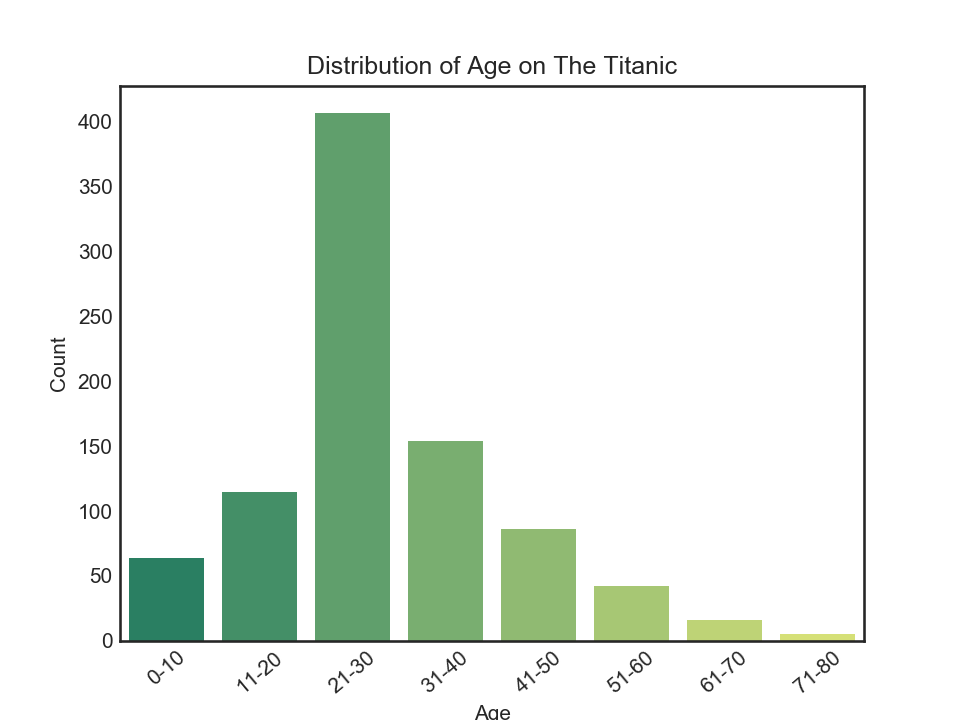

In [20]:
plt.figure()
sns.countplot(titanic_train['Age_Range'],palette='summer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age on The Titanic')
plt.xticks(rotation=40);

## Survivors by Age Range and Sex
- Seems like males between the ages of 0-10 and females regardless of age took priority in being evacuated.
- This does not take into account where people where at the time of the crash.
- Also no one can be 0 years old, there seem to be babies on board and they are shown like 0.4 excetra

In [21]:
titanic_train.groupby(['Sex','Age_Range']).Survived.mean().reset_index()

,Sex,Age_Range,Survived
0,female,0-10,0.612903
1,female,11-20,0.739130
2,female,21-30,0.723881
3,female,31-40,0.833333
4,female,41-50,0.677419
5,female,51-60,0.928571
6,female,61-70,1.000000
7,male,0-10,0.575758
8,male,11-20,0.144928
9,male,21-30,0.142857


In [22]:
titanic_train.groupby('Sex').Survived.mean().reset_index()

,Sex,Survived
0,female,0.740385
1,male,0.188908


<IPython.core.display.Javascript object>


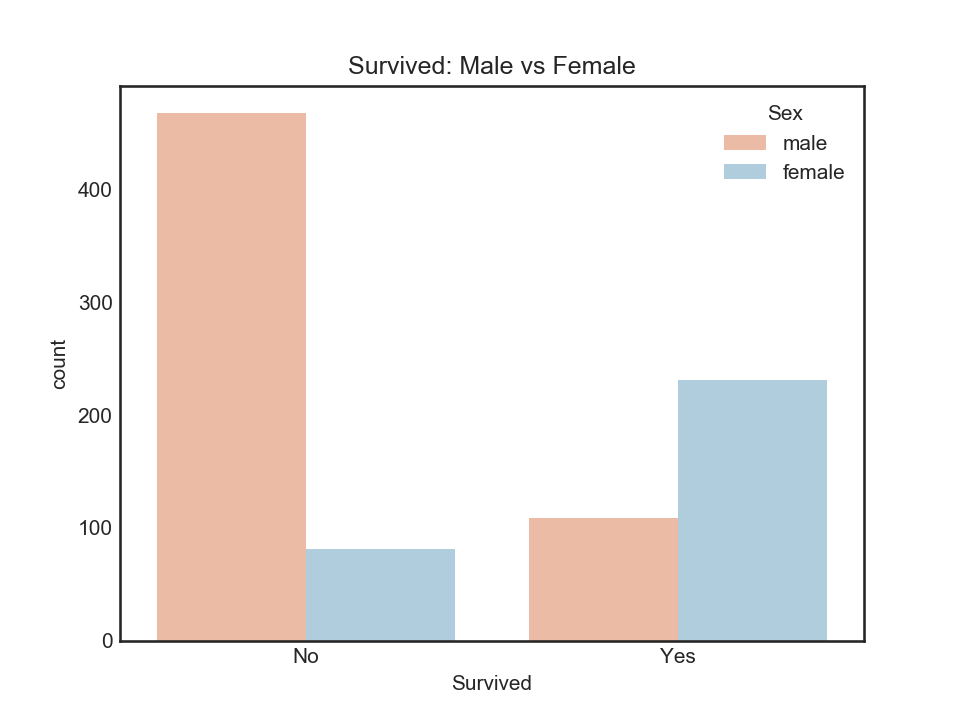

In [23]:
plt.figure()
sns.countplot(x=titanic_train['Survived'],hue=titanic_train['Sex'],palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.title('Survived: Male vs Female');

In [24]:
died = titanic_train[titanic_train.Survived == 0]
lived = titanic_train[titanic_train.Survived == 1]

<IPython.core.display.Javascript object>


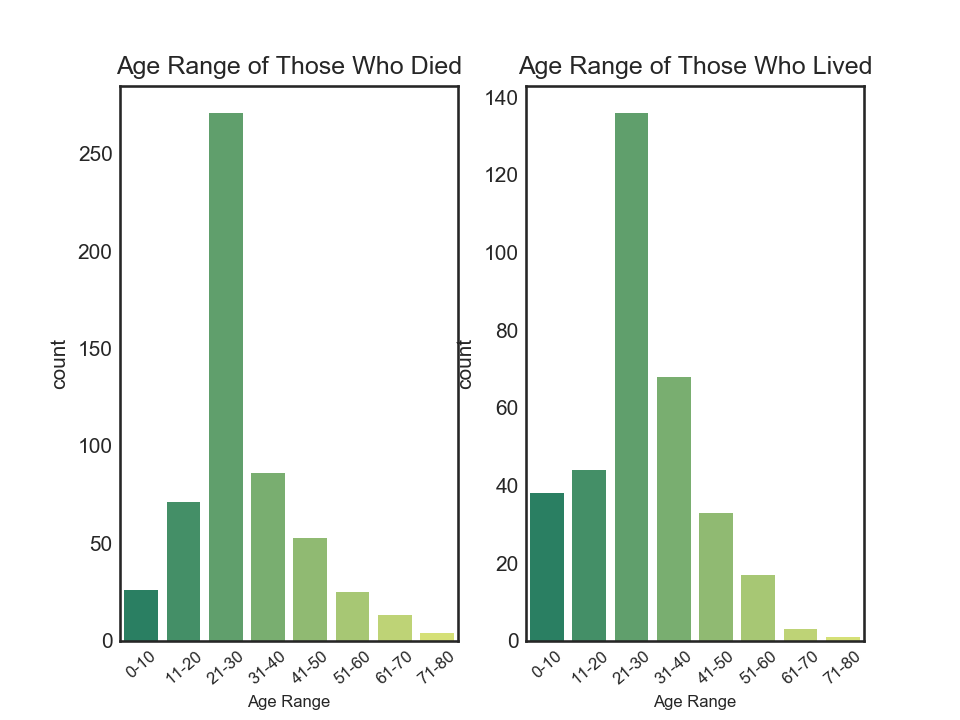

In [25]:
plt.figure()
plt.subplot(1,2,1)
sns.countplot(died['Age_Range'],palette='summer')
plt.title('Age Range of Those Who Died')
plt.xticks(rotation=40,fontsize=8);
plt.xlabel('Age Range',fontsize=8);
plt.subplot(1,2,2)
sns.countplot(lived['Age_Range'],palette='summer')
plt.title('Age Range of Those Who Lived')
plt.xticks(rotation=40,fontsize=8);
plt.xlabel('Age Range',fontsize=8);

<IPython.core.display.Javascript object>


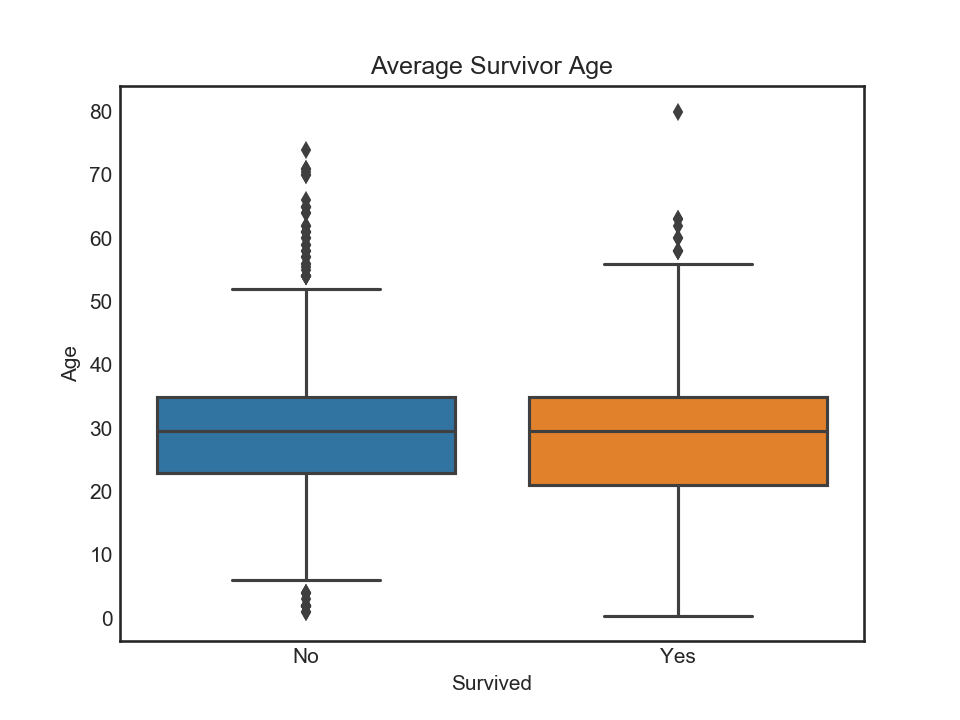

In [26]:
plt.figure()
sns.boxplot(titanic_train.Survived,titanic_train.Age)
plt.xticks([0,1],['No','Yes'])
plt.title('Average Survivor Age');

In [27]:
titanic_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [28]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,21-30


In [29]:
titanic_train = titanic_train.drop(['Age_Range','Ticket','Name','PassengerId'],axis=1)

titanic_train['Sex'] = titanic_train['Sex'].astype('category')

titanic_train['Sex'] = titanic_train.Sex.cat.codes

In [30]:
titanic_train.Sex.unique()

array([1, 0], dtype=int64)

In [31]:
titanic_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S


In [32]:
embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)
embarked.head(2)

,Q,S
0,0,1
1,0,0


In [33]:
titanic_train = pd.concat([titanic_train, embarked], axis=1)
titanic_train.drop('Embarked',inplace=True,axis=1)
titanic_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0


In [34]:
y = titanic_train.Survived.values

X = titanic_train.drop('Survived',axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.3)

c = [0.001,0.01,1,10]

for i in c:
    log_model = LogisticRegression(C=i,random_state=101)
    log_model.fit(X_train,y_train)
    print(f'C = {i} \n Accuracy: {round(log_model.score(X_test,y_test) *100)}')

log_model = LogisticRegression(C=1)

log_model.fit(X_train,y_train)

preds = log_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

C = 0.001 
 Accuracy: 69.0
C = 0.01 
 Accuracy: 71.0
C = 1 
 Accuracy: 81.0
C = 10 
 Accuracy: 82.0
[[147  16]
 [ 36  68]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

